## Decision Tree

#### 1. Write a program to demonstrate the working of the decision tree. Use an given data set for building the decision tree and apply this knowledge to classify a new sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("weatherdata - weatherdata.csv")

In [3]:
df

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [4]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Answer         0
dtype: int64

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

print("Encoded DataFrame:")
df

Encoded DataFrame:


,Outlook,Temperature,Humidity,Wind,Answer
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


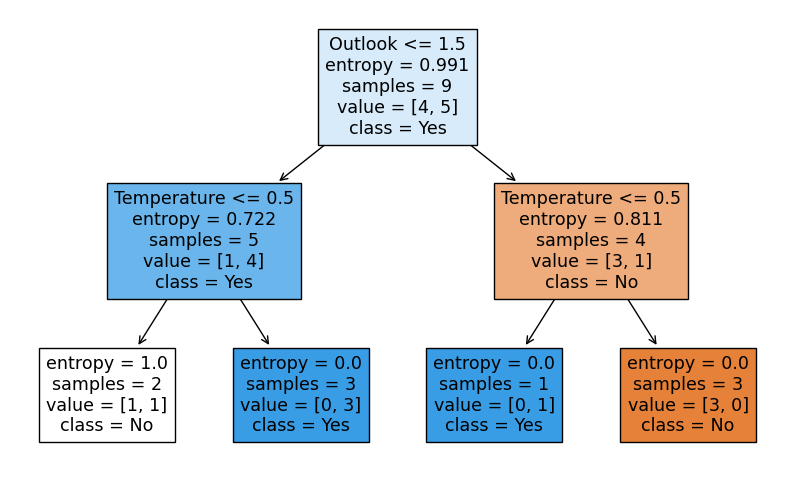

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df.drop(columns=['Answer'])
y = df['Answer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [7]:
new_sample = [[2, 1, 0, 1]]  
prediction = clf.predict(new_sample)
print("Prediction on new sample : ",prediction)

Prediction on new sample :  [0]


C:\Users\nitee\anaconda3\online data analysis internship\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### 2. Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

- Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

- It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('drugdata - drugdata.csv')


label_encoder = LabelEncoder()


data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

data.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,0,0,0,25.355,4
1,1,47,1,1,0,13.093,2
2,2,47,1,1,0,10.114,2
3,3,28,0,2,0,7.798,3
4,4,61,0,1,0,18.043,4


In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# Display the modified DataFrame
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


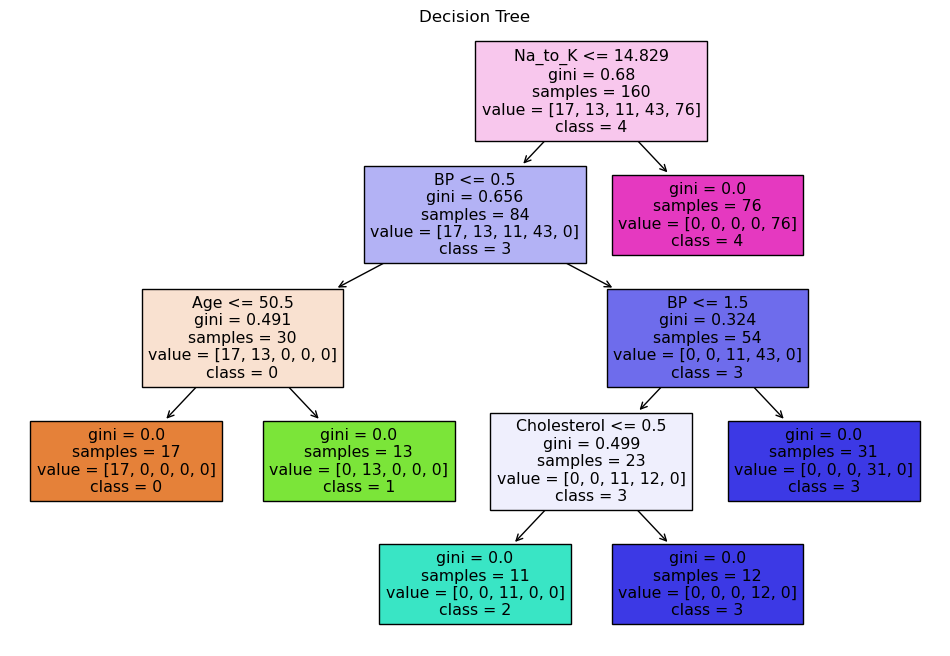

Predicted drug for the new patient: [4]


C:\Users\nitee\anaconda3\online data analysis internship\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
X = data.drop(columns=['Drug'])
y = data['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_])
plt.title("Decision Tree")
plt.show()


new_patient = [[35, 1, 0, 0,25]]  
prediction = clf.predict(new_patient)
print("Predicted drug for the new patient:", prediction)